In [1]:
#importing the basic required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the daataset form sklearn.datasets library
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
#data contains in the form of dictionary
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#discription of the dataset
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [7]:
#converting into dataframe 
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
#standardizing the data 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data=scaler.fit_transform(df)

In [40]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [41]:
#importing the PCA
from sklearn.decomposition import PCA

In [53]:
#creating the PCA model
pca = PCA(n_components= 2)

In [54]:
#Applying the pca to data, reducing the data from 30 dimensions to 2 dimensions 
x_pca = pca.fit_transform(scaled_data)

In [55]:
x_pca.shape

(569, 2)

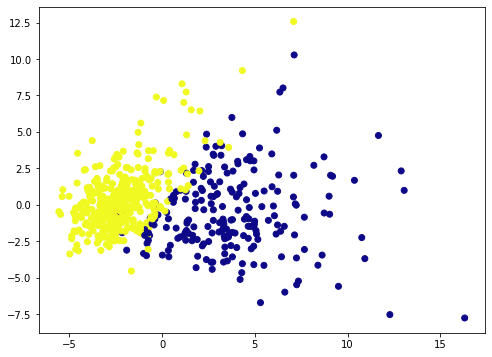

In [57]:
#ploting the graph between target value and pca_values
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0] ,x_pca[:,1], c= cancer['target'], cmap= 'plasma')

In [60]:
y=cancer['target']

In [67]:
#now we can import the any Machine learning model to classify the targets 
#here i am using Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
RF= RandomForestClassifier()

In [72]:
#splitting the data into train and validation sets to chech model accuracy 
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test= train_test_split(x_pca, y, test_size=0.2, random_state=1)

In [74]:
#fitting the RF to train data 
model=RF.fit(x_train, y_train)

In [75]:
#preedicting target values
y_pred= model.predict(x_test)

In [76]:
#importing accuracy score to check how wellthe model is performed 
from sklearn.metrics import accuracy_score

In [78]:
#here is the accuracy score 
accuracy_score(y_pred, y_test)

0.9385964912280702

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
DT= DecisionTreeClassifier()

In [88]:
model= DT.fit(x_train, y_train)

In [89]:
y_pred_dt = model.predict(x_test)

In [91]:
accuracy_score(y_pred_dt, y_test)

0.9035087719298246

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier()

In [99]:
model = knn.fit(x_train, y_train)

In [100]:
y_pred = model.predict(x_test)

In [101]:
accuracy_score(y_pred, y_test)

0.956140350877193

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
gb = GradientBoostingClassifier()

In [105]:
model = gb.fit(x_train, y_train)

In [106]:
y_pred = model.predict(x_test)

In [107]:
accuracy_score(y_pred, y_test)

0.9298245614035088

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
nb = GaussianNB()

In [110]:
model = nb.fit(x_train,  y_train)

In [112]:
y_pred= model.predict(x_test)

In [114]:
accuracy_score(y_pred, y_test)

0.9035087719298246

Here i have applied 5 algorithms in wich knn preformed well. as no. of samples are are very less RF, and gradient boost got some what less  accuracy comapared to knn.